In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
import pandas as pd
from collections import Counter
import spacy

def analyze_pos(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    word_counts = Counter()
    pos_counts = Counter()
    lemma_counts = Counter()

    for token in doc:
        word_counts[token.text] += 1
        pos_counts[token.pos_] += 1
        lemma_counts[token.lemma_] += 1

    return dict(word_counts), dict(pos_counts), dict(lemma_counts)

def add_analysis_columns(df, text_column):
    df[['word_counts', 'pos_counts', 'lemma_counts']] = df[text_column].apply(
        lambda x: pd.Series(analyze_pos(x))
    )

    return df



In [77]:
chaplin_learners_all = add_analysis_columns(chaplin_learners_all, 'Text')

In [78]:
chaplin_learners_all

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,Year at university/school,L1,Father's native language,Mother's native language,Languages spoken at home,Age of exposure to English,Years studying English,Stay abroad in English speaking country (>= 1 month),Stay abroad (where),Stay abroad (when),Stay abroad (months),Language certificates (type and level),Proficiency (self-assessment) speaking,Proficiency (self-assessment) listening,Proficiency (self-assessment) reading,Proficiency (self-assessment) writing,Proficiency (self-assessment),Additional foreign language(s),Proficiency (self-assessment) in additional language speaking,Proficiency (self-assessment) in additional language listening,Proficiency (self-assessment) in additional language reading,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writing/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text,word_counts,pos_counts,word_pos_pairs,token_details,tokens,lemma_counts
0,Learners,DE_SP_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",2,German,German,German,German,10,10.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B1 (lower intermediate),3.75 / 6,French,B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,Ok this story is about toch uh Charles Chaplin...,NaN,"{'Ok': 1, 'this': 2, 'story': 1, 'is': 4, 'abo...","{'INTJ': 32, 'DET': 45, 'NOUN': 63, 'AUX': 9, ...","[(Ok, INTJ), (this, DET), (story, NOUN), (is, ...","[{'text': 'Ok', 'pos': 'INTJ', 'lemma': 'ok', ...","[Ok, this, story, is, about, toch, uh, Charles...","{'ok': 1, 'this': 2, 'story': 1, 'be': 5, 'abo..."
1,Learners,DE_WR_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",2,German,German,German,German,10,10.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B1 (lower intermediate),3.75 / 6,French,B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),Written,14,14. Chaplin,written_online,40.0,Outside classroom,Monolingual dictionary (Spanish),Charlie Chaplin is walking down a street with ...,NaN,"{'Charlie': 2, 'Chaplin': 11, 'is': 7, 'walkin...","{'PROPN': 26, 'AUX': 13, 'VERB': 76, 'ADP': 59...","[(Charlie, PROPN), (Chaplin, PROPN), (is, AUX)...","[{'text': 'Charlie', 'pos': 'PROPN', 'lemma': ...","[Charlie, Chaplin, is, walking, down, a, stree...","{'Charlie': 2, 'Chaplin': 11, 'be': 9, 'walk':..."
2,Learners,DE_WR_B1_24_16_14_MW,2018,39 / 60,65.0,B1 (lower intermediate),Female,24,Universität Bremen,Sprachwissenschaften,Germanistik und English-Speaking-Cultures,German,German,German,German,8,16.0,No,NaN,NaN,0.0,NaN,C1 (lower advanced),C1 (lower advanced),C1 (lower advanced),B2 (upper intermediate),4.75 / 6,Spanish,C2 (upper advanced),C2 (upper advanced),C2 (upper advanced),C1 (lower advanced),Written,14,14. Chaplin,written_online,10.0,Outside classroom,NaN,"In this video ""The boy, the kid"" by Charles Ch...",NaN,"{'In': 1, 'this': 3, 'video': 1, '""': 2, 'The'...","{'ADP': 17, 'DET': 22, 'NOUN': 26, 'PUNCT': 11...","[(In, ADP), (this, DET), (video, NOUN), ("", PU...","[{'text': 'In', 'pos': 'ADP', 'lemma': 'in', '...","[In, this, video, "", The, boy, ,, the, kid, "",...","{'in': 3, 'this': 3, 'video': 1, '""': 2, 'the'..."
3,Learners,DE_WR_B2_21_13_14_DS,2018,40 / 60,66.7,B2 (upper intermediate),Male,21,Universität Bremen,SoSe 2018 (2. Semester),Musikwissenschaften/English-Speaking Cultures,German,Russian,Russian,German,8,13.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),4 / 

In [ ]:
chaplin_learners_all.to_csv('chaplin_learners_analysis4.csv', sep='\t', encoding='utf-8', index=False)

In [ ]:
a = chaplin_learners_all['Year data collection'].value_counts()
a

Year data collection
2018    414
2020    176
2019    140
2017     91
2021      6
Name: count, dtype: int64

In [ ]:
def add_total_counts(df, column_name):
    df['total_counts'] = df[column_name].apply(lambda x: sum(eval(x).values()) if isinstance(x, str) and x.startswith('{') else 0)

    return df

data = {
    'pos_counts': ["{'DET': 45, 'NOUN': 52, 'PUNCT': 28}", "{'VERB': 30, 'ADJ': 15, 'ADV': 10}"]
}
df = pd.DataFrame(data)

df = add_total_counts(df, 'pos_counts')
print(df)


                             pos_counts  total_counts
0  {'DET': 45, 'NOUN': 52, 'PUNCT': 28}           125
1    {'VERB': 30, 'ADJ': 15, 'ADV': 10}            55


In [ ]:
new_df =  df[['Text','word_counts', 'pos_counts']] = df['Text'].apply(lambda x: pd.Series(analyze_pos(x)))
new_df

KeyboardInterrupt: 

In [ ]:
def combine_counters(df, column_name):
    total_counter = Counter()
    for index, row in df.iterrows():
        total_counter += row[column_name]
    return total_counter


total_pos_counts = combine_counters(df, 'word_counts')
print(total_pos_counts)


Counter({'text': 2, '.': 2, 'This': 1, 'is': 1, 'a': 1, 'sample': 1, 'Another': 1, 'example': 1})


In [ ]:
df.to_csv('result.csv', sep='\t', encoding='utf-8')

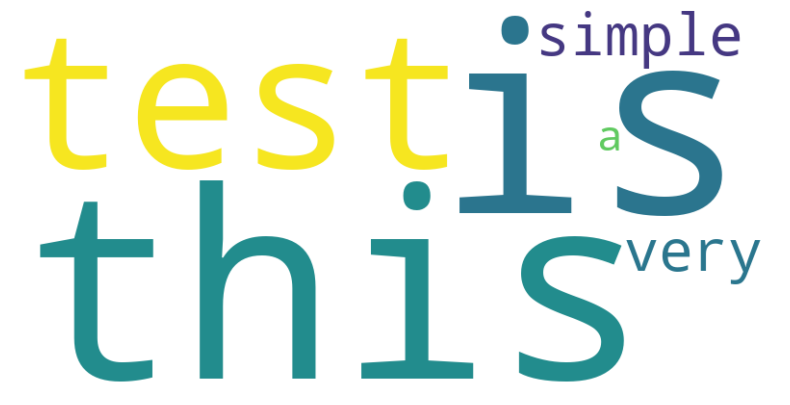

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq = [('this', 2), ('is', 2), ('test', 2), ('simple', 2), ('very', 2), ('a', 1)]

word_freq_dict = dict(word_freq)

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

combined_text = ' '.join(df['Text'])

print(combined_text)

Chaplin find a baby in the street. He pick up the baby and carry up. Chaplin see a mother with other baby in a baby buggy and try leave the baby but the mother see Chaplin and avoids it. Afterwards Chaplin leave the baby in the street but the policeman too avoids it. Then Chaplin see a man, and he ask if he can pick up the baby, the man accepts and when he have baby in her arms Chaplin begins to run. Then, the other man, leave the baby in the baby buggy and run. The baby buggy owner see Chaplin and beat him. When Charles Chaplin wolkin in the Street one bebe it fell to floor. After confusión whit one mothar and one policeman, finallly one letter say: Love and care for this bebe orphan. Charles go with de bebe for gives him love and care.
Them finally the film.
This is the history of the film video de Chaplin. One feeling history of the bebe orfan in teh city.
Charles is see in several occasions for on policeman. Him see fixedly to Carles, which ranning away to the Street. I see a Chapl

In [ ]:
result2 = analyze_pos(combined_text)
print(result2)

{'Chaplin': 'PROPN', 'find': 'VERB', 'a': 'DET', 'baby': 'NOUN', 'in': 'ADP', 'the': 'DET', 'street': 'NOUN', '.': 'PUNCT', 'He': 'PRON', 'pick': 'VERB', 'up': 'ADP', 'and': 'CCONJ', 'carry': 'VERB', 'see': 'VERB', 'mother': 'NOUN', 'with': 'ADP', 'other': 'ADJ', 'buggy': 'NOUN', 'try': 'VERB', 'leave': 'VERB', 'but': 'CCONJ', 'avoids': 'VERB', 'it': 'PRON', 'Afterwards': 'ADV', 'policeman': 'NOUN', 'too': 'ADV', 'Then': 'ADV', 'man': 'NOUN', ',': 'PUNCT', 'he': 'PRON', 'ask': 'VERB', 'if': 'SCONJ', 'can': 'AUX', 'accepts': 'VERB', 'when': 'SCONJ', 'have': 'VERB', 'her': 'PRON', 'arms': 'NOUN', 'begins': 'VERB', 'to': 'PART', 'run': 'VERB', 'The': 'DET', 'owner': 'NOUN', 'beat': 'VERB', 'him': 'PRON', 'When': 'SCONJ', 'Charles': 'PROPN', 'wolkin': 'ADV', 'Street': 'PROPN', 'one': 'NUM', 'bebe': 'NOUN', 'fell': 'VERB', 'floor': 'NOUN', 'After': 'ADV', 'confusión': 'NOUN', 'whit': 'VERB', 'mothar': 'NOUN', 'finallly': 'ADV', 'letter': 'NOUN', 'say': 'VERB', ':': 'PUNCT', 'Love': 'VERB', 

In [ ]:
data = {
    'pos_counts': [
        {'NOUN': 19, 'PRON': 1, 'AUX': 1, 'DET': 1, 'PUNCT': 1},
        {'NOUN': 2, 'DET': 1, 'PUNCT': 1}
    ]
}
df = pd.DataFrame(data)
df

,pos_counts
0,"{'NOUN': 19, 'PRON': 1, 'AUX': 1, 'DET': 1, 'P..."
1,"{'NOUN': 2, 'DET': 1, 'PUNCT': 1}"


In [ ]:
import pandas as pd
from collections import Counter

# data = {
#     'pos_counts': [
#         Counter({'NOUN': 2, 'PRON': 1, 'AUX': 1, 'DET': 1, 'PUNCT': 1}),
#         Counter({'NOUN': 2, 'DET': 1, 'PUNCT': 1})
#     ]
# }
# df = pd.DataFrame(data)

def sum_counters(df, column_name):
    total_counter = Counter()
    for counter in df[column_name]:
        total_counter += counter
    return total_counter

total_counts = sum_counters(df, 'pos_counts')
total_counts



Counter({'NOUN': 21, 'DET': 2, 'PUNCT': 2, 'PRON': 1, 'AUX': 1})

In [ ]:
chaplin_learners_all = pd.read_csv('chaplin_row_data.csv', sep='\t', encoding='utf-8')
chaplin_learners_all.head(5)

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,...,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writing/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text
0,Learners,DE_SP_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",...,B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,Ok this story is about toch uh Charles Chaplin...,NaN
1,Learners,DE_WR_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",...,B1 (lower intermediate),Written,14,14. Chaplin,written_online,40.0,Outside classroom,Monolingual dictionary (Spanish),Charlie Chaplin is walking down a street with ...,NaN
2,Learners,DE_WR_B1_24_16_14_MW,2018,39 / 60,65.0,B1 (lower intermediate),Female,24,Universität Bremen,Sprachwissenschaften,...,C1 (lower advanced),Written,14,14. Chaplin,written_online,10.0,Outside classroom,NaN,"In this video ""The boy, the kid"" by Charles Ch...",NaN
3,Learners,DE_WR_B2_21_13_14_DS,2018,40 / 60,66.7,B2 (upper intermediate),Male,21,Universität Bremen,SoSe 2018 (2. Semester),...,NaN,Written,14,14. Chaplin,written_online,7.0,Outside classroom,Background readings about the task topic (news...,"In the following clip, one can see Charlie Cha...",NaN
4,Learners,DE_WR_B2_22_11_14_AK,2019,41 / 60,68.3,B2 (upper intermediate),Male,22,Universität Bremen,English-speaking-cultures,...,B2 (upper intermediate),Written,14,14. Chaplin,written_online,900.0,Outside classroom,NaN,The short movie is about Charlie Chaplin findi...,NaN


In [ ]:
import pandas as pd
import ast 

def count(df, column_name):
    totals = {}
    for row in df[column_name]:
        if isinstance(row, str):
            row = ast.literal_eval(row)

        for key, value in row.items():
            totals[key] = totals.get(key, 0) + value

    return totals

result = count(chaplin_learners_all, 'word_counts')
result


{'Ok': 1,
 'this': 1162,
 'story': 72,
 'is': 2852,
 'about': 374,
 'toch': 1,
 'uh': 4021,
 'Charles': 826,
 'Chaplin': 3072,
 'get': 327,
 'in': 3144,
 'touch': 4,
 'with': 2838,
 'the': 17433,
 'baby': 8534,
 'and': 8485,
 'it': 2864,
 'starts': 381,
 'when': 833,
 'he': 8550,
 'walks': 707,
 'down': 769,
 'a': 6565,
 'shabby': 7,
 'side': 54,
 'road': 46,
 '/': 5130,
 'people': 98,
 'threw': 33,
 'their': 72,
 'trash': 214,
 'out': 739,
 'of': 2543,
 'window': 190,
 'was': 1131,
 'hit': 209,
 'by': 925,
 'some': 283,
 'then': 1058,
 'um': 1,
 'put': 624,
 'on': 1502,
 'new': 71,
 'cigarette': 339,
 'heard': 3,
 'screaming': 9,
 'looked': 43,
 'ground': 212,
 'where': 753,
 'lies': 12,
 'picks': 350,
 'up': 943,
 'looks': 341,
 'at': 711,
 'behind': 140,
 'him': 3679,
 'there': 671,
 '’s': 256,
 'woman': 2020,
 ' ': 530,
 'carrying': 80,
 'ba': 1,
 '=': 11,
 'baggy': 12,
 'turns': 95,
 'around': 369,
 'decides': 519,
 'that': 2887,
 'maybe': 50,
 'she': 1282,
 'mother': 476,
 'or': 

In [ ]:
count_df = pd.DataFrame.from_dict(result, orient='index', columns=['count'])
count_df['percentage'] = (count_df['count'] / count_df['count'].sum()) * 100
count_df['percentage'] = count_df['percentage'].round(2)
count_df


,count,percentage
Ok,1,0.00
this,1162,0.51
story,72,0.03
is,2852,1.25
about,374,0.16
...,...,...
intruder,1,0.00
raising,2,0.00
explanation,1,0.00
enrolled,1,0.00


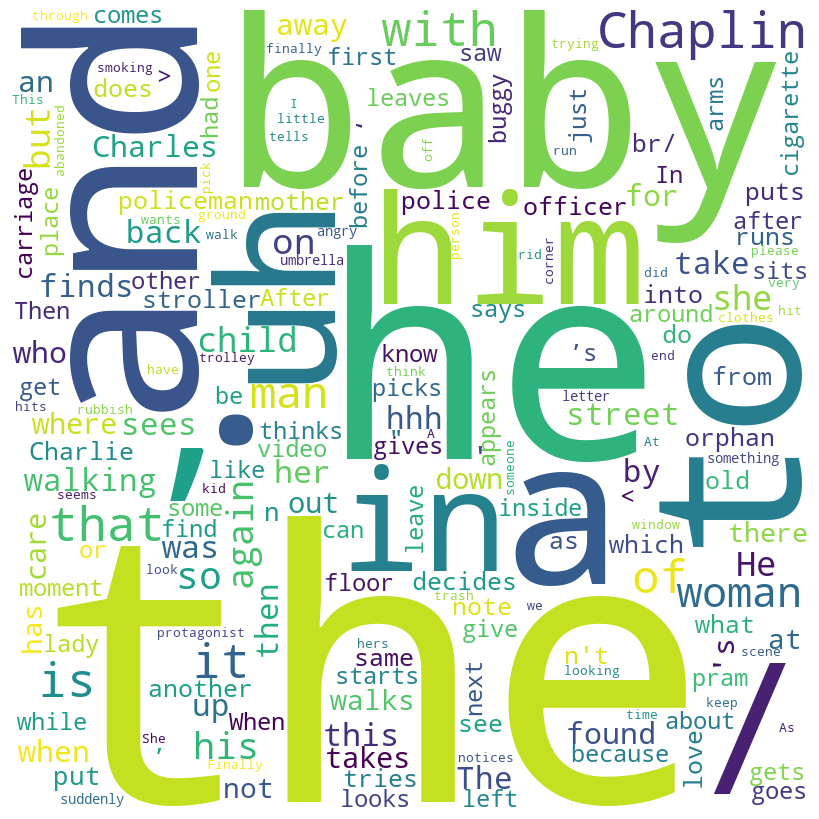

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(result)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

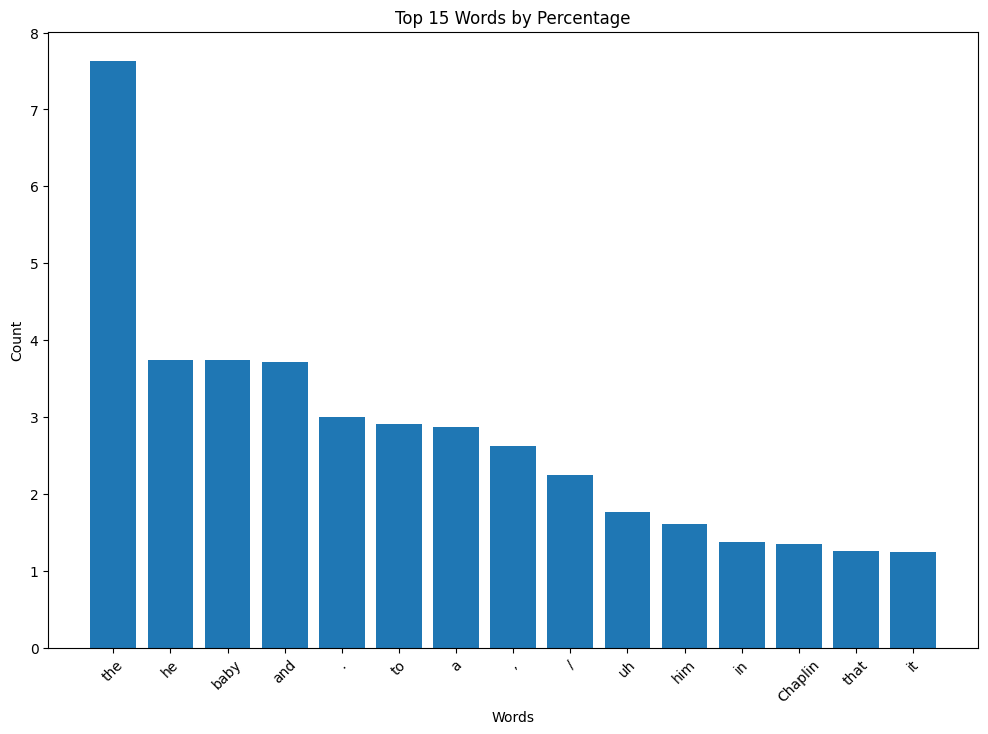

In [ ]:
top_15 = count_df.sort_values('percentage', ascending=False).head(15)

plt.figure(figsize=(12, 8))
plt.bar(top_15.index, top_15['percentage'])
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 15 Words by Percentage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

def count_value_in_dataframe_column(df, column_name, search_key):
    if column_name not in df.columns:
        return "Column not found in DataFrame"

    column_data = df.at[0, column_name]

    return column_data.get(search_key, 0)

data = {'words_count': [{'Ok': 1, 'this': 2, 'story': 1, 'is': 4, 'about': 1, 'toch': 1, 'uh': 27, 'Charles': 1, 'Chaplin': 3, 'get': 1, 'in': 4, 'touch': 1, 'with': 4, 'the': 30}]}
df = pd.DataFrame(data)

count = count_value_in_dataframe_column(df, 'words_count', 'is')
print(f"The count of 'is': {count}")


The count of 'is': 4


In [54]:
import spacy

nlp = spacy.load('en_core_web_sm')

def add_word_pos_pairs(df, text_column):

    def get_word_pos_pairs(text):
        doc = nlp(text)
        return [(token.text, token.pos_) for token in doc]

    df['word_pos_pairs'] = df[text_column].apply(get_word_pos_pairs)

    return df

# data = {'text_column': ["The quick brown fox jumps over the lazy dog", 
#                         "I am learning the Natural Language Processing"]}
# df_example = pd.DataFrame(data)

# df_with_pos = add_word_pos_pairs(df_example, 'text_column')
# df_with_pos

In [79]:
chaplin_learners_all = add_word_pos_pairs(chaplin_learners_all, 'Text')
chaplin_learners_all

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,Year at university/school,L1,Father's native language,Mother's native language,Languages spoken at home,Age of exposure to English,Years studying English,Stay abroad in English speaking country (>= 1 month),Stay abroad (where),Stay abroad (when),Stay abroad (months),Language certificates (type and level),Proficiency (self-assessment) speaking,Proficiency (self-assessment) listening,Proficiency (self-assessment) reading,Proficiency (self-assessment) writing,Proficiency (self-assessment),Additional foreign language(s),Proficiency (self-assessment) in additional language speaking,Proficiency (self-assessment) in additional language listening,Proficiency (self-assessment) in additional language reading,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writing/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text,word_counts,pos_counts,word_pos_pairs,token_details,tokens,lemma_counts
0,Learners,DE_SP_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",2,German,German,German,German,10,10.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B1 (lower intermediate),3.75 / 6,French,B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,Ok this story is about toch uh Charles Chaplin...,NaN,"{'Ok': 1, 'this': 2, 'story': 1, 'is': 4, 'abo...","{'INTJ': 32, 'DET': 45, 'NOUN': 63, 'AUX': 9, ...","[(Ok, INTJ), (this, DET), (story, NOUN), (is, ...","[{'text': 'Ok', 'pos': 'INTJ', 'lemma': 'ok', ...","[Ok, this, story, is, about, toch, uh, Charles...","{'ok': 1, 'this': 2, 'story': 1, 'be': 5, 'abo..."
1,Learners,DE_WR_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",2,German,German,German,German,10,10.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B1 (lower intermediate),3.75 / 6,French,B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),Written,14,14. Chaplin,written_online,40.0,Outside classroom,Monolingual dictionary (Spanish),Charlie Chaplin is walking down a street with ...,NaN,"{'Charlie': 2, 'Chaplin': 11, 'is': 7, 'walkin...","{'PROPN': 26, 'AUX': 13, 'VERB': 76, 'ADP': 59...","[(Charlie, PROPN), (Chaplin, PROPN), (is, AUX)...","[{'text': 'Charlie', 'pos': 'PROPN', 'lemma': ...","[Charlie, Chaplin, is, walking, down, a, stree...","{'Charlie': 2, 'Chaplin': 11, 'be': 9, 'walk':..."
2,Learners,DE_WR_B1_24_16_14_MW,2018,39 / 60,65.0,B1 (lower intermediate),Female,24,Universität Bremen,Sprachwissenschaften,Germanistik und English-Speaking-Cultures,German,German,German,German,8,16.0,No,NaN,NaN,0.0,NaN,C1 (lower advanced),C1 (lower advanced),C1 (lower advanced),B2 (upper intermediate),4.75 / 6,Spanish,C2 (upper advanced),C2 (upper advanced),C2 (upper advanced),C1 (lower advanced),Written,14,14. Chaplin,written_online,10.0,Outside classroom,NaN,"In this video ""The boy, the kid"" by Charles Ch...",NaN,"{'In': 1, 'this': 3, 'video': 1, '""': 2, 'The'...","{'ADP': 17, 'DET': 22, 'NOUN': 26, 'PUNCT': 11...","[(In, ADP), (this, DET), (video, NOUN), ("", PU...","[{'text': 'In', 'pos': 'ADP', 'lemma': 'in', '...","[In, this, video, "", The, boy, ,, the, kid, "",...","{'in': 3, 'this': 3, 'video': 1, '""': 2, 'the'..."
3,Learners,DE_WR_B2_21_13_14_DS,2018,40 / 60,66.7,B2 (upper intermediate),Male,21,Universität Bremen,SoSe 2018 (2. Semester),Musikwissenschaften/English-Speaking Cultures,German,Russian,Russian,German,8,13.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),4 / 

In [80]:
def add_word_pos_pairs(df, text_column):
    def get_word_pos_pairs(text):
        doc = nlp(text)
        return [{'text': token.text, 'pos': token.pos_, 'lemma': token.lemma_, 'morph': token.morph} for token in doc]

    df['token_details'] = df[text_column].apply(get_word_pos_pairs)
    return df

# data = {'text_column': ["The quick brown fox jumps over the lazy dog", 
#                         "I am learning the Natural Language Processing"]}
# df_example = pd.DataFrame(data)

chaplin_learners_all = add_word_pos_pairs(chaplin_learners_all, 'Text')
chaplin_learners_all

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,Year at university/school,L1,Father's native language,Mother's native language,Languages spoken at home,Age of exposure to English,Years studying English,Stay abroad in English speaking country (>= 1 month),Stay abroad (where),Stay abroad (when),Stay abroad (months),Language certificates (type and level),Proficiency (self-assessment) speaking,Proficiency (self-assessment) listening,Proficiency (self-assessment) reading,Proficiency (self-assessment) writing,Proficiency (self-assessment),Additional foreign language(s),Proficiency (self-assessment) in additional language speaking,Proficiency (self-assessment) in additional language listening,Proficiency (self-assessment) in additional language reading,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writing/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text,word_counts,pos_counts,word_pos_pairs,token_details,tokens,lemma_counts
0,Learners,DE_SP_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",2,German,German,German,German,10,10.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B1 (lower intermediate),3.75 / 6,French,B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,Ok this story is about toch uh Charles Chaplin...,NaN,"{'Ok': 1, 'this': 2, 'story': 1, 'is': 4, 'abo...","{'INTJ': 32, 'DET': 45, 'NOUN': 63, 'AUX': 9, ...","[(Ok, INTJ), (this, DET), (story, NOUN), (is, ...","[{'text': 'Ok', 'pos': 'INTJ', 'lemma': 'ok', ...","[Ok, this, story, is, about, toch, uh, Charles...","{'ok': 1, 'this': 2, 'story': 1, 'be': 5, 'abo..."
1,Learners,DE_WR_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",2,German,German,German,German,10,10.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B1 (lower intermediate),3.75 / 6,French,B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),B1 (lower intermediate),Written,14,14. Chaplin,written_online,40.0,Outside classroom,Monolingual dictionary (Spanish),Charlie Chaplin is walking down a street with ...,NaN,"{'Charlie': 2, 'Chaplin': 11, 'is': 7, 'walkin...","{'PROPN': 26, 'AUX': 13, 'VERB': 76, 'ADP': 59...","[(Charlie, PROPN), (Chaplin, PROPN), (is, AUX)...","[{'text': 'Charlie', 'pos': 'PROPN', 'lemma': ...","[Charlie, Chaplin, is, walking, down, a, stree...","{'Charlie': 2, 'Chaplin': 11, 'be': 9, 'walk':..."
2,Learners,DE_WR_B1_24_16_14_MW,2018,39 / 60,65.0,B1 (lower intermediate),Female,24,Universität Bremen,Sprachwissenschaften,Germanistik und English-Speaking-Cultures,German,German,German,German,8,16.0,No,NaN,NaN,0.0,NaN,C1 (lower advanced),C1 (lower advanced),C1 (lower advanced),B2 (upper intermediate),4.75 / 6,Spanish,C2 (upper advanced),C2 (upper advanced),C2 (upper advanced),C1 (lower advanced),Written,14,14. Chaplin,written_online,10.0,Outside classroom,NaN,"In this video ""The boy, the kid"" by Charles Ch...",NaN,"{'In': 1, 'this': 3, 'video': 1, '""': 2, 'The'...","{'ADP': 17, 'DET': 22, 'NOUN': 26, 'PUNCT': 11...","[(In, ADP), (this, DET), (video, NOUN), ("", PU...","[{'text': 'In', 'pos': 'ADP', 'lemma': 'in', '...","[In, this, video, "", The, boy, ,, the, kid, "",...","{'in': 3, 'this': 3, 'video': 1, '""': 2, 'the'..."
3,Learners,DE_WR_B2_21_13_14_DS,2018,40 / 60,66.7,B2 (upper intermediate),Male,21,Universität Bremen,SoSe 2018 (2. Semester),Musikwissenschaften/English-Speaking Cultures,German,Russian,Russian,German,8,13.0,No,NaN,NaN,0.0,NaN,B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),B2 (upper intermediate),4 / 

In [58]:
chaplin_learners_all.to_csv('chaplin_learners_analysis4.csv', sep='\t', encoding='utf-8', index=False)

In [37]:

def search_surrounding_words_pos(df, search_word):
    prev_results = [] 
    next_results = []

    for word_pos_pairs in df['word_pos_pairs']: 
        for i, (word, pos) in enumerate(word_pos_pairs):
            if word == search_word:
                if i > 0:
                    prev_word, prev_pos = word_pos_pairs[i-1]
                    prev_results.append((prev_word, prev_pos))
                if i < len(word_pos_pairs) - 1:
                    next_word, next_pos = word_pos_pairs[i+1]
                    next_results.append((next_word, next_pos))

    prev_df = pd.DataFrame(prev_results, columns=['word', 'POS'])
    next_df = pd.DataFrame(next_results, columns=['word', 'POS'])

    return prev_df, next_df


prev_df, next_df = search_surrounding_words_pos(chaplin_learners_all, 'the')
print("前の単語とPOS:")
print(prev_df)
print("\n後の単語とPOS:")
print(next_df)


前の単語とPOS:
             word    POS
0            with    ADP
1              of    ADP
2              on    ADP
3           where  SCONJ
4              at    ADP
...           ...    ...
17415  abandoning   VERB
17416     holding   VERB
17417  abandoning   VERB
17418        with    ADP
17419         for    ADP

[17420 rows x 2 columns]

後の単語とPOS:
         word   POS
0        baby  NOUN
1      window  NOUN
2      ground  NOUN
3        baby  NOUN
4        baby  NOUN
...       ...   ...
17428    baby  NOUN
17429    baby  NOUN
17430    baby  NOUN
17431    baby  NOUN
17432    baby  NOUN

[17433 rows x 2 columns]


In [40]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "eat eats eaten eating"

doc = nlp(text)

for token in doc:
    print(token.text, "->", token.lemma_)


eat -> eat
eats -> eat
eaten -> eat
eating -> eat


In [41]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "I ate an apple yesterday."

doc = nlp(text)

for token in doc:
    print(f"Word: {token.text}, POS: {token.pos_}, Lemma: {token.lemma_}, Morph: {token.morph}")


Word: I, POS: PRON, Lemma: I, Morph: Case=Nom|Number=Sing|Person=1|PronType=Prs
Word: ate, POS: VERB, Lemma: eat, Morph: Tense=Past|VerbForm=Fin
Word: an, POS: DET, Lemma: an, Morph: Definite=Ind|PronType=Art
Word: apple, POS: NOUN, Lemma: apple, Morph: Number=Sing
Word: yesterday, POS: NOUN, Lemma: yesterday, Morph: Number=Sing
Word: ., POS: PUNCT, Lemma: ., Morph: PunctType=Peri


In [43]:
import spacy
import pandas as pd

# spaCyのモデルをロード
nlp = spacy.load("en_core_web_sm")

def add_word_pos_pairs(df, text_column):
    def get_word_pos_pairs(text):
        doc = nlp(text)
        return [(token.text, token.pos_, token.lemma_, token.morph) for token in doc]

    df['word_pos_pairs'] = df[text_column].apply(get_word_pos_pairs)

    return df

# サンプルデータ
data = {'text_column': ["The quick brown fox jumps over the lazy dog", 
                        "I am learning the Natural Language Processing"]}
df_example = pd.DataFrame(data)

# 関数を適用
df_with_pos = add_word_pos_pairs(df_example, 'text_column')
df_with_pos

,text_column,word_pos_pairs
0,The quick brown fox jumps over the lazy dog,"[(The, DET, the, (Definite=Def, PronType=Art))..."
1,I am learning the Natural Language Processing,"[(I, PRON, I, (Case=Nom, Number=Sing, Person=1..."


In [46]:
nlp = spacy.load("en_core_web_sm")

def add_word_pos_pairs(df, text_column):
    def get_word_pos_pairs(text):
        doc = nlp(text)
        return [{'text': token.text, 'pos': token.pos_, 'lemma': token.lemma_, 'morph': token.morph} for token in doc]

    df['token_details'] = df[text_column].apply(get_word_pos_pairs)
    return df

data = {'text_column': ["The quick brown fox jumps over the lazy dog", 
                        "I am learning the Natural Language Processing"]}
df_example = pd.DataFrame(data)

df_with_pos = add_word_pos_pairs(df_example, 'text_column')
df_with_pos

,text_column,word_pos_pairs
0,The quick brown fox jumps over the lazy dog,"[{'text': 'The', 'pos': 'DET', 'lemma': 'the',..."
1,I am learning the Natural Language Processing,"[{'text': 'I', 'pos': 'PRON', 'lemma': 'I', 'm..."


In [65]:
import pandas as pd

def search_surrounding_words_pos(df, search_word):
    prev_results = []  
    next_results = []  

    for word_pos_pairs in df['word_pos_pairs']:
        for i, word_info in enumerate(word_pos_pairs):
            word = word_info['text']
            pos = word_info['pos']
            if word == search_word:
                if i > 0:
                    prev_word_info = word_pos_pairs[i-1]
                    prev_results.append((prev_word_info['text'], prev_word_info['pos']))
                if i < len(word_pos_pairs) - 1:
                    next_word_info = word_pos_pairs[i+1]
                    next_results.append((next_word_info['text'], next_word_info['pos']))

    prev_df = pd.DataFrame(prev_results, columns=['word', 'POS'])
    next_df = pd.DataFrame(next_results, columns=['word', 'POS'])

    return prev_df, next_df




In [71]:
# サンプルデータ
data = {'word_pos_pairs': [
    [{'text': 'Ok', 'pos': 'INTJ', 'lemma': 'ok', 'morph': ''}, 
     {'text': 'eats', 'pos': 'DET', 'lemma': 'eat', 'morph': 'Number=Sing|PronType=Dem'},
     {'text': 'this', 'pos': 'DET', 'lemma': 'this', 'morph': 'Number=Sing|PronType=Dem'}]
]}
df_example = pd.DataFrame(data)
df_example


,word_pos_pairs
0,"[{'text': 'Ok', 'pos': 'INTJ', 'lemma': 'ok', ..."


In [72]:
# 関数を適用
prev_df, next_df = search_surrounding_words_pos(df_example, 'eats')

print("前の単語と品詞:")
prev_df

前の単語と品詞:


,word,POS
0,Ok,INTJ


In [64]:
print("\n次の単語と品詞:")
next_df


次の単語と品詞:


,word,POS
0,this,DET


In [2]:
import pandas as pd

# Read each CSV file into a DataFrame
df_famous_person = pd.read_csv("learners_all_famous-person.csv", sep='\t', encoding='utf-8')
df_film = pd.read_csv("learners_all_film.csv", sep='\t', encoding='utf-8')
df_frog = pd.read_csv("learners_all_frog.csv", sep='\t', encoding='utf-8')
df_chaplin = pd.read_csv("learners_all_chaplin.csv", sep='\t', encoding='utf-8')

# Concatenate all DataFrames into one
combined_df = pd.concat([df_famous_person, df_film, df_frog, df_chaplin])

# Optionally, if you want to reset the index
combined_df.reset_index(drop=True, inplace=True)
combined_df

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,...,Where the task was done,Resources used,Text,Original text,word_counts,pos_counts,lemma_counts,word_pos_pairs,token_details,tokens
0,Learners,ES_WR_A1_20_14_2_EOC,2017,10 / 60,16.7,A1 (lower beginner),Female,20.0,Universitat de Barcelona,Filología hispánica,...,Outside classroom,NaN,I have decided to write about a famous person ...,NaN,"{'I': 4, 'have': 2, 'decided': 1, 'to': 1, 'wr...","{'PRON': 22, 'AUX': 12, 'VERB': 15, 'PART': 5,...","{'I': 4, 'have': 2, 'decide': 1, 'to': 1, 'wri...","[('I', 'PRON'), ('have', 'AUX'), ('decided', '...","[{'text': 'I', 'pos': 'PRON', 'lemma': 'I', 'm...",NaN
1,Learners,ES_WR_A1_18_15_2_MR,2017,14 / 60,23.3,A1 (lower beginner),Female,18.0,UNIVERSIDAD DE VALLADOLID,ESTUDIOS INGLESES,...,Outside classroom,NaN,"Once upon a time, there was a little child who...",NaN,"{'Once': 1, 'upon': 1, 'a': 6, 'time': 1, ',':...","{'ADV': 13, 'SCONJ': 10, 'DET': 23, 'NOUN': 32...","{'once': 1, 'upon': 1, 'a': 6, 'time': 1, ',':...","[('Once', 'ADV'), ('upon', 'SCONJ'), ('a', 'DE...","[{'text': 'Once', 'pos': 'ADV', 'lemma': 'once...",NaN
2,Learners,ES_WR_A1_28_8_4_IVLL,2020,15 / 60,25.0,A1 (lower beginner),Female,28.0,NaN,LENGUAS MODERNAS CULTURA Y COMUNICACIÓN,...,Outside classroom,NaN,I would like to speak about Angela Davis. I re...,NaN,"{'I': 2, 'would': 1, 'like': 2, 'to': 1, 'spea...","{'PRON': 10, 'AUX': 7, 'VERB': 10, 'PART': 2, ...","{'I': 3, 'would': 1, 'like': 2, 'to': 1, 'spea...","[('I', 'PRON'), ('would', 'AUX'), ('like', 'VE...","[{'text': 'I', 'pos': 'PRON', 'lemma': 'I', 'm...",NaN
3,Learners,ES_WR_A1_15_12_2_M,2017,16 / 60,26.7,A1 (lower beginner),Male,15.0,Salesianas valdepeñas,NaN,...,Outside classroom,Background readings about the task topic (news...,"Lionel Messi was born on June 24, 1987 in the ...",NaN,"{'Lionel': 1, 'Messi': 5, 'was': 8, 'born': 1,...","{'PROPN': 55, 'AUX': 11, 'VERB': 23, 'ADP': 48...","{'Lionel': 1, 'Messi': 5, 'be': 10, 'bear': 1,...","[('Lionel', 'PROPN'), ('Messi', 'PROPN'), ('wa...","[{'text': 'Lionel', 'pos': 'PROPN', 'lemma': '...",NaN
4,Learners,ES_WR_A1_15_5_2_GSC,2017,16 / 60,26.7,A1 (lower beginner),Male,15.0,Ntra.Sra.de los dolores,NaN,...,Outside classroom,Background readings about the task topic (news...,He is a soccer player He plays like goalkeeper...,NaN,"{'He': 3, 'is': 1, 'a': 4, 'soccer': 1, 'playe...","{'PRON': 24, 'AUX': 8, 'DET': 41, 'NOUN': 48, ...","{'he': 11, 'be': 8, 'a': 4, 'soccer': 1, 'play...","[('He', 'PRON'), ('is', 'AUX'), ('a', 'DET'), ...","[{'text': 'He', 'pos': 'PRON', 'lemma': 'he', ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,Learners,ES_SP_C2_19_15_14_LPI,2018,60 / 60,100.0,C2 (upper advanced),Female,19.0,Universidad de Granada,Traducción e Interpretación,...,Outside classroom,"Bilingual dictionary (Spanish/English), Spellc...",Charles Chaplin is walking down the street whe...,NaN,"{'Charles': 2, 'Chaplin': 4, 'is': 2, 'walking...","{'PROPN': 6, 'AUX': 8, 'VERB': 39, 'ADP': 14, ...","{'Charles': 2, 'Chaplin': 4, 'be': 5, 'walk': ...","[('Charles', 'PROPN'), ('Chaplin', 'PROPN'), (...","[{'text': 'Charles', 'pos': 'PROPN', 'lemma': ...","['Charles', 'Chaplin', 'is', 'walking', 'down'..."
1806,Learners,ES_WR_C2_19_15_14_LPI,2018,60 / 60,100.0,C2 (upper advanced),Female,19.0,Universidad de Granada,Traducción e Interpretación,...,Outside classroom,"Bilingual dictionary (Spanish/English), Spellc...",Charles Chaplin is walking down a narrow and d...,NaN,"{'Charles': 1, 'Chaplin': 3, 'is': 3, 'walking...","{'PROPN': 4, 'AUX': 3, 'VERB': 23, 'ADP': 9, '...","{'Charles': 1, 'Chaplin': 3, 'be': 3, 'walk': ...","[('Charles', 'PROPN'), ('Chaplin', 'PROPN'), (...","[{'text': 'Charles', 'pos': 'PROPN', 'lemma': ...","['Charles', 'Chaplin', 'is', 'walking', 'down'..."
1807,Learners,ES_SP_C2_24_18_14_EB,2021,60 / 60,100.0,C2 (upper adva

In [3]:
combined_df.to_csv('learners_combined_data.csv', sep='\t', encoding='utf-8', index=False)